# 실습1: MNIST data set

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(train_input, train_target), (test_input, test_target) = keras.datasets.mnist.load_data()

print(train_input.shape) # (60000, 28, 28)
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

(60000, 28, 28)


In [2]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
          padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2))

model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',
          padding='same'))
model.add(keras.layers.MaxPool2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu', name='hidden'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 hidden (Dense)              (None, 100)               3

In [3]:
keras.utils.plot_model(model)
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-mnist-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2062 - accuracy: 0.9366 - val_loss: 0.0561 - val_accuracy: 0.9815
Epoch 2/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0769 - accuracy: 0.9766 - val_loss: 0.0386 - val_accuracy: 0.9880
Epoch 3/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0540 - accuracy: 0.9839 - val_loss: 0.0458 - val_accuracy: 0.9865
Epoch 4/20
1500/1500 [==============================] - 23s 16ms/step - loss: 0.0421 - accuracy: 0.9876 - val_loss: 0.0399 - val_accuracy: 0.9898


{'loss': [0.2061755508184433, 0.07691118866205215, 0.05398743227124214, 0.04210088402032852], 'accuracy': [0.9365833401679993, 0.9766250252723694, 0.9839166402816772, 0.9875624775886536], 'val_loss': [0.056068964302539825, 0.038580846041440964, 0.04583084210753441, 0.03986124321818352], 'val_accuracy': [0.9815000295639038, 0.9879999756813049, 0.9865000247955322, 0.9898333549499512]}


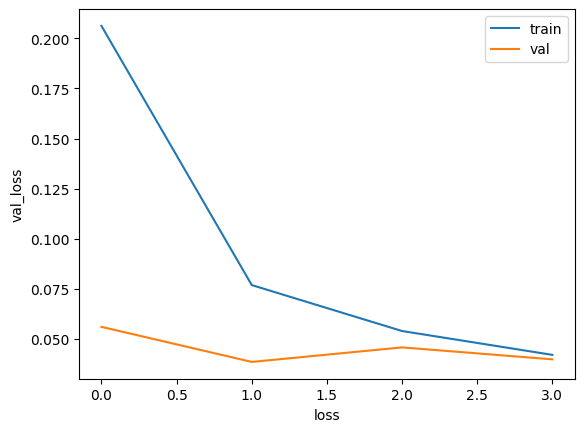

In [5]:
print(history.history)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('loss')
plt.ylabel('val_loss')
plt.legend(['train', 'val'])
plt.show()

In [9]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.0386 - accuracy: 0.9880


[0.038580846041440964, 0.9879999756813049]

In [8]:
test_scaled = test_input.reshape(-1, 28, 28, 1)
model.evaluate(test_scaled, test_target) 

313/313 [==============================] - 2s 4ms/step - loss: 5.7395 - accuracy: 0.9884


[5.7394609451293945, 0.9883999824523926]